In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import pickle
import os.path
import seaborn
import pickle
import os.path
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']

import seaborn as sns
#sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
#plt.style.use('ggplot')
mpl.rc('xtick', labelsize=40) 
mpl.rc('ytick', labelsize=40) 
%matplotlib inline

In [118]:
#读取数据
if os.path.exists('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
with open('train_analysis_1.pickle','rb') as f1:
    data = pickle.load(f1)  

In [4]:
fee_detail = pd.read_csv('/home/zhh/文档/阿里巴巴/data/fee_detail.csv')

/home/zhh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
fee_detail['医院编码'] = fee_detail['医院编码'].map(lambda x:str(x).split(".")[0])

In [6]:
fee_detail.head()

,顺序号,医院编码,三目统计项目,三目服务项目名称,三目医院服务项目名称,剂型,规格,单价,数量,拒付原因编码,拒付原因,费用发生时间
0,MT13061601133880864,1306,7.0,普通门诊挂号费---三级医院,挂号,,,1.0,1.0,NaN,NaN,2016-01-13
1,MT13061601133880864,1306,3.0,NaN,挂号,,,3.0,1.0,NaN,NaN,2016-01-13
2,MT13061601154123666,1306,3.0,NaN,挂号,,,3.0,1.0,NaN,NaN,2016-01-15
3,MT13061601154123666,1306,7.0,普通门诊挂号费---三级医院,挂号,,,1.0,1.0,NaN,NaN,2016-01-15
4,MT13061602298982056,1306,7.0,普通门诊挂号费---三级医院,挂号,,,1.0,1.0,NaN,NaN,2016-02-29


In [7]:
fee_detail_label = pd.merge(data[['顺序号','个人编码','医院编码','标签']],fee_detail
         ,left_on = ['顺序号','医院编码'],right_on=['顺序号','医院编码'],how='left')
fee_detail_label = fee_detail_label.drop_duplicates()  #去重

In [8]:
del data  #删除数据
del fee_detail  #删除费用detail

In [9]:
fee_detail_label.shape

(2598974, 14)

In [10]:
#统计空值
np.sum(fee_detail_label.isnull())

顺序号                 0
个人编码                0
医院编码                0
标签                  0
三目统计项目              4
三目服务项目名称      2277932
三目医院服务项目名称    2258414
剂型                  4
规格                  4
单价                  4
数量                  4
拒付原因编码        2598945
拒付原因          2598945
费用发生时间              4
dtype: int64

In [11]:
#统计空值的比例
np.sum(fee_detail_label.isnull())/fee_detail_label.shape[0]*100.0


顺序号            0.000000
个人编码           0.000000
医院编码           0.000000
标签             0.000000
三目统计项目         0.000154
三目服务项目名称      87.647356
三目医院服务项目名称    86.896368
剂型             0.000154
规格             0.000154
单价             0.000154
数量             0.000154
拒付原因编码        99.998884
拒付原因          99.998884
费用发生时间         0.000154
dtype: float64

In [12]:
#删除拒付原因编码和拒付原因
fee_detail_label.drop(['拒付原因编码','拒付原因'],axis=1,inplace=True)

In [13]:
fee_detail_label.head()

,顺序号,个人编码,医院编码,标签,三目统计项目,三目服务项目名称,三目医院服务项目名称,剂型,规格,单价,数量,费用发生时间
0,MT01801607015822812,352120001523108,180,1,3.0,NaN,NaN,,,3.0,1.0,2016-07-01
1,MT01431607015822815,352120001475556,143,0,3.0,NaN,NaN,,,2.5,1.0,2016-07-01
2,MT01431607015822815,352120001475556,143,0,3.0,糖尿病门诊诊察费（门特加收）,糖尿病门诊诊察费,,,10.0,1.0,2016-07-01
3,MT01101607015822817,352120003484886,110,0,3.0,NaN,NaN,,,2.5,1.0,2016-07-01
4,MT01101607015822838,352120002750505,110,0,3.0,NaN,NaN,,,2.5,1.0,2016-07-01


In [14]:
#删除顺序号再去重
fee_detail_label.drop('顺序号',axis=1,inplace=True)
fee_detail_label.drop_duplicates(inplace=True)
fee_detail_label.shape

(2519436, 11)

In [15]:
if os.path.exists('/home/zhh/文档/阿里巴巴/data/4.分析fee_detail/'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/4.分析fee_detail/')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/4.分析fee_detail/')
    os.chdir('/home/zhh/文档/阿里巴巴/data/4.分析fee_detail/')
with open('fee_detail_label1.pickle','wb') as f1:
    pickle.dump(fee_detail_label,f1)  

In [2]:
if os.path.exists('/home/zhh/文档/阿里巴巴/data/4.分析fee_detail/'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/4.分析fee_detail/')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/4.分析fee_detail/')
    os.chdir('/home/zhh/文档/阿里巴巴/data/4.分析fee_detail/')
with open('fee_detail_label1.pickle','rb') as f1:
    fee_detail_label = pickle.load(f1)

# 词云分析

In [3]:
#导入结巴的分析类，提取语句中的关键字，取Top100
import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
new_smfw = fee_detail_label['三目服务项目名称'].fillna('空值')
sanmu_service = ''.join(new_smfw.tolist())

In [5]:
tags = jieba.analyse.extract_tags(sanmu_service, topK=100)
wc= WordCloud(font_path='/home/zhh/下载/SimHei.ttf',width=1000,height=500, margin=2) #制作词云
my_wordcloud=wc.generate(' '.join(tags).encode('utf-8').decode('utf-8'))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.955 seconds.
Prefix dict has been built succesfully.


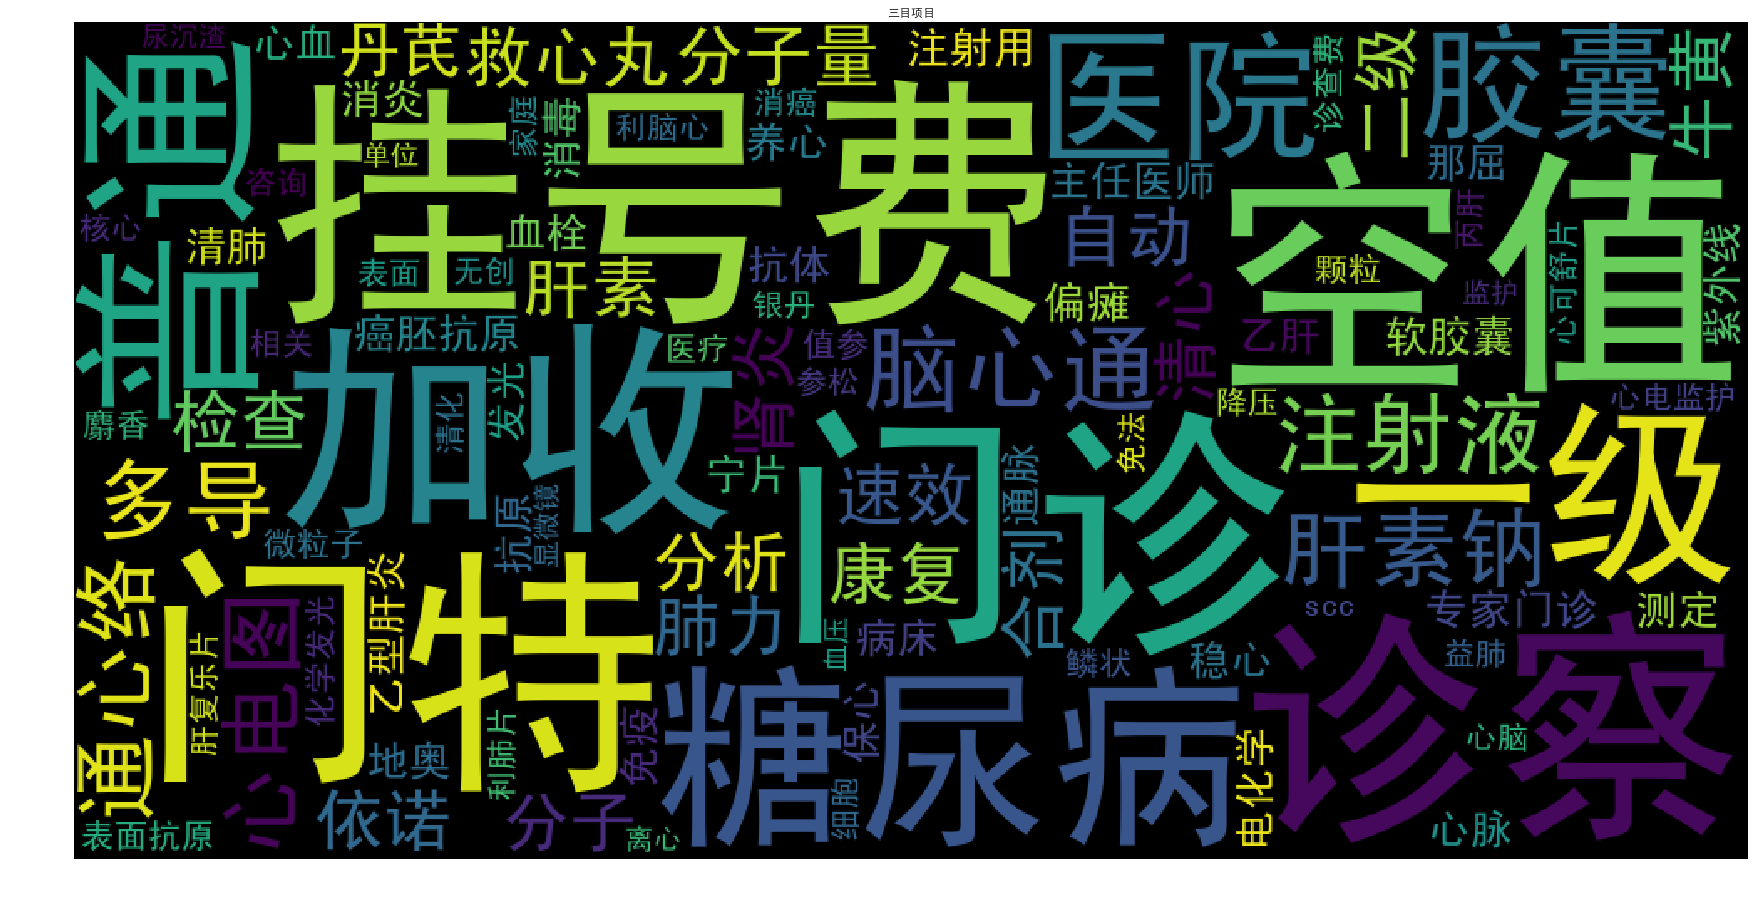

In [6]:
plt.figure(figsize=(30,20))
plt.title('三目项目')
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [7]:
' '.join(tags)

'空值 门诊 挂号费 门特 诊察 加收 糖尿病 一级 普通 医院 胶囊 脑心通 注射液 肝素钠 多导 心电图 通心络 救心丸 自动 检查 速效 分子量 分析 依诺 肝素 肾炎 康复 肺力 合剂 牛黄 清心 二级 分子 丹芪 专家门诊 偏瘫 软胶囊 注射用 癌胚抗原 主任医师 地奥 抗体 养心 乙型肝炎 测定 病床 那屈 宁片 乙肝 心血 心脉 清肺 血栓 紫外线 电化学 稳心 消毒 消炎 通脉 抗原 发光 保心 免疫 表面抗原 颗粒 麝香 微粒子 化学发光 值参 诊查费 鳞状 scc 心电监护 表面 免法 核心 家庭 细胞 利脑心 银丹 心脑 消癌 心可舒片 益肺 丙肝 肝复乐片 相关 参松 利肺片 清化 咨询 医疗 无创 降压 尿沉渣 离心 单位 血压 监护 显微镜'

In [8]:
sanmu = ''.join(new_smfw.unique().tolist())
tags = jieba.analyse.extract_tags(sanmu, topK=50)
wc= WordCloud(font_path='/home/zhh/下载/SimHei.ttf',width=1000,height=500, margin=2) #制作词云
my_wordcloud=wc.generate(' '.join(tags).encode('utf-8').decode('utf-8'))

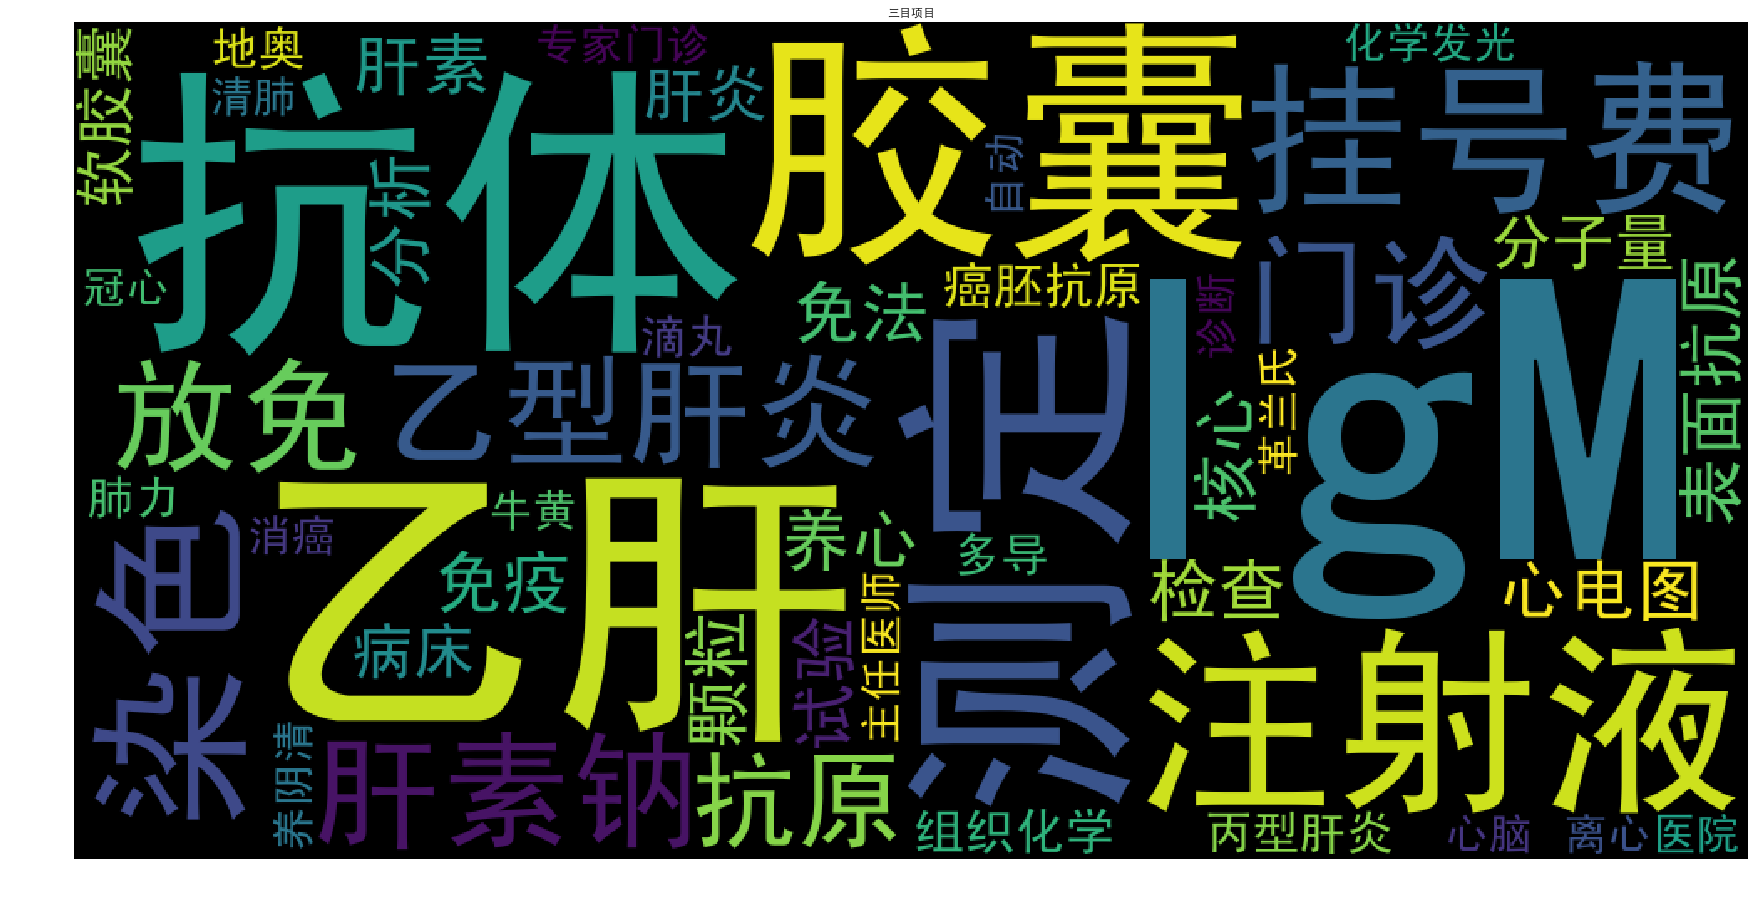

In [9]:
plt.figure(figsize=(30,20))
plt.title('三目项目')
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [3]:
# 将nan值填充为空值
fee_detail_label['三目服务项目名称'] = fee_detail_label['三目服务项目名称'].fillna('空值')

In [4]:
menzhen = fee_detail_label[fee_detail_label['三目服务项目名称'].str.contains('胶囊')][['个人编码','标签','三目服务项目名称']]

In [5]:
menzhen = menzhen.drop_duplicates()

In [59]:
menzhen.groupby('三目服务项目名称')['个人编码'].count()

三目服务项目名称
丹芪偏瘫胶囊       181
冠心丹参胶囊         1
冠心舒通胶囊         6
利脑心胶囊         25
参松养心胶囊        74
地奥心血康胶囊        2
地奥心血康软胶囊     207
心脑康胶囊          1
海昆肾喜胶囊         1
肺力咳胶囊         50
脑心通胶囊       2334
芪苈强心胶囊         1
通心络胶囊       1228
银丹心脑通软胶囊      22
Name: 个人编码, dtype: int64

In [6]:
def convert_diease_name(name):
    diease_types = []
      
    #1空值
    if name =='空值':
        kongzhi = 1
    else:  
        kongzhi = 0
    
    #3普通门诊 
    if any(word in name for word in ['普通门诊']):
        ptmz = 1
    else:
        ptmz = 0
    
    
    #5糖尿病门诊
    if  any(word in name for word in ['糖尿病门诊']):
        tnbmz = 1
    else:
        tnbmz = 0
        
    #6其他门诊
    if '门诊' in name and all(word not in name for word in ['糖尿病门诊','普通门诊']):
        qtmz = 1 
    else:
        qtmz  = 0
        
    #7乙肝
    if any(word in name for word in ['乙肝']):
        yigan = 1
    else:
        yigan = 0
        
    #肝素钙
    if any(word in name for word in ['肝素钙']):
        gansugai = 1
    else:
        gansugai = 0 
    
    #脑心通胶囊
    if any(word in name for word in ['脑心通']):
        nxtjn= 1
    else:
         nxtjn = 0 
    
     #1通心络   
    if any(word in name for word in ['通心络']):
        txljn = 1
    else:
        txljn = 0
        
    if '胶囊' in name and all(word not in name for word in ['通心络','脑心通']):
        qtjn = 1
    else: 
        qtjn  = 0
   
    
    #15其他
    qita_list =[ '空值','普通门诊','糖尿病门诊','乙肝','肝素钙','脑心通','通心络','胶囊','门诊']
    
    if all(word not in i for word in qita_list):
        qita = 1
    else:
        qita =0
        
    diease_types.append([kongzhi, ptmz, tnbmz,qtmz,yigan,gansugai,nxtjn,txljn,qtjn,qita])

    return diease_types

In [7]:
##*****************三目服务项目名称**********************************
diease_columns =[['三目空值','普通门诊','糖尿病门诊','其他门诊','乙肝','肝素钙','脑心通胶囊','通心络胶囊','其他胶囊','三目其他']]

for i in fee_detail_label['三目服务项目名称']:
    a = convert_diease_name(i)
    diease_columns.append(a[0])

#生成Dataframe
diease_columns = pd.DataFrame(diease_columns[1:],columns = diease_columns[0])

#连接diease_name.
diease_name_new = pd.concat([fee_detail_label.reset_index(drop=True)
                             ,diease_columns.reset_index(drop=True)],axis=1).drop_duplicates()
diease_name_new0 =diease_name_new[['个人编码','三目空值','普通门诊','糖尿病门诊','其他门诊',
                                   '乙肝','肝素钙','脑心通胶囊','通心络胶囊','其他胶囊','三目其他','标签']]

diease_name_new0

diease_name_new = diease_name_new0.groupby('个人编码').sum().reset_index(inplace = False)
diease_name_new ['标签'] = diease_name_new ['标签'].map(lambda x :1 if x >=1 else 0)

In [8]:
diease_name_new ['标签'].value_counts()

0    15171
1      789
Name: 标签, dtype: int64

In [12]:
##*****************三目医院服务项目名称**********************************
hospital_columns =[['医院_三目空值','医院_普通门诊','医院_糖尿病门诊','医院_其他门诊','医院_乙肝','医院_肝素钙'
                  ,'医院_脑心通胶囊','医院_通心络胶囊','医院_其他胶囊','医院_三目其他']]
fee_detail_label['三目医院服务项目名称'] = fee_detail_label['三目医院服务项目名称'].fillna('空值')
for i in fee_detail_label['三目医院服务项目名称']:
    a = convert_diease_name(i)
    hospital_columns.append(a[0])

#生成Dataframe
hospital_columns = pd.DataFrame(hospital_columns[1:],columns = hospital_columns[0])

#连接hospital_name.
hospital_name_new = pd.concat([fee_detail_label.reset_index(drop=True)
                             ,hospital_columns.reset_index(drop=True)],axis=1).drop_duplicates()
hospital_name_new0 =hospital_name_new[['个人编码','医院_三目空值','医院_普通门诊','医院_糖尿病门诊','医院_其他门诊',
                                   '医院_乙肝','医院_肝素钙','医院_脑心通胶囊','医院_通心络胶囊','医院_其他胶囊',
                                   '医院_三目其他','标签']]

hospital_name_new = hospital_name_new0.groupby('个人编码').sum().reset_index(inplace = False)
hospital_name_new ['标签'] = hospital_name_new ['标签'].map(lambda x :1 if x >=1 else 0)

In [14]:
hospital_name_new.head()

,个人编码,医院_三目空值,医院_普通门诊,医院_糖尿病门诊,医院_其他门诊,医院_乙肝,医院_肝素钙,医院_脑心通胶囊,医院_通心络胶囊,医院_其他胶囊,医院_三目其他,标签
0,352120000000231,93,10,0,0,0,0,0,0,0,4,0
1,352120000000386,71,1,0,0,0,0,0,0,0,5,0
2,352120000000408,90,11,0,0,0,0,3,0,0,2,0
3,352120000000409,44,14,0,0,0,0,0,0,0,9,0
4,352120000000511,63,0,0,0,0,0,0,0,0,28,0


In [27]:
fee_detail_label.groupby(['三目统计项目'])['个人编码'].nunique()


三目统计项目
1.0    15901
2.0    11544
3.0    15959
4.0       90
5.0      568
6.0    12095
7.0    11535
9.0       16
Name: 个人编码, dtype: int64

In [36]:
#总价的影响
fee_detail_label ['总价'] = fee_detail_label['单价']  * fee_detail_label['数量']

In [44]:
fee_sum = fee_detail_label.groupby('个人编码',as_index=False)['总价'].sum()

In [55]:
fee_sum_label = pd.merge(fee_sum,fee_detail_label[['个人编码','标签']],how = 'left') 

In [56]:
fee_sum_label.drop_duplicates(inplace=True)
fee_sum_label.reset_index(inplace=True,drop=True)

In [83]:
# 画分布
def plot_fee(columns,data,start=0,end=100000):
    #散点图
    sns.set_context( "poster" , font_scale = 0.75)
    fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,6)) #图像大小
    ax0.set(title =columns,xlabel='标签',ylabel=columns) 
    sns.stripplot(y=columns, x="标签", data=data,ax=ax0,jitter=False)
    
    
    #分布图
    
    sns.kdeplot(data[data['标签']==1][columns],ax=ax1,label='骗保')
    sns.kdeplot(data[data['标签']==0][columns],ax=ax1,label='非骗保')
    #sns.distplot(data[data['标签']==0][columns],ax=ax1,kde=False,color='b',label='非骗保')
    ax1.set(title =columns,xlabel=columns,ylabel='频数',xlim=[start,end]) 
    ax1.legend()
    fig.suptitle('Fee Analysis', fontsize=20, fontweight='bold');
    #plt.savefig(columns+'.png')  #保存图像
    

    
    
    
#药品费发生金额画出散点图
def plot_log_fee(columns,data,start=0,end=100000):

    
    fig,ax1 = plt.subplots(figsize=(15,6))
    #分布图
    sns.kdeplot(np.log(data[columns]+0.00001),ax=ax1,label='全部')
    sns.kdeplot(np.log(data[data['标签']==1][columns]+0.00001),ax=ax1,label='骗保')
    sns.kdeplot(np.log(data[data['标签']==0][columns]+0.00001),ax=ax1,label='非骗保')
    #sns.distplot(data[data['标签']==0][columns],ax=ax1,kde=False,color='b',label='非骗保')
    ax1.set(title =columns,xlabel=columns,ylabel='频数',xlim=[start,end]) 
    ax1.legend()
    fig.suptitle('Fee Analysis', fontsize=20, fontweight='bold');
    #plt.savefig(columns+'.png')  #保存图像
    plt.show()

/home/zhh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


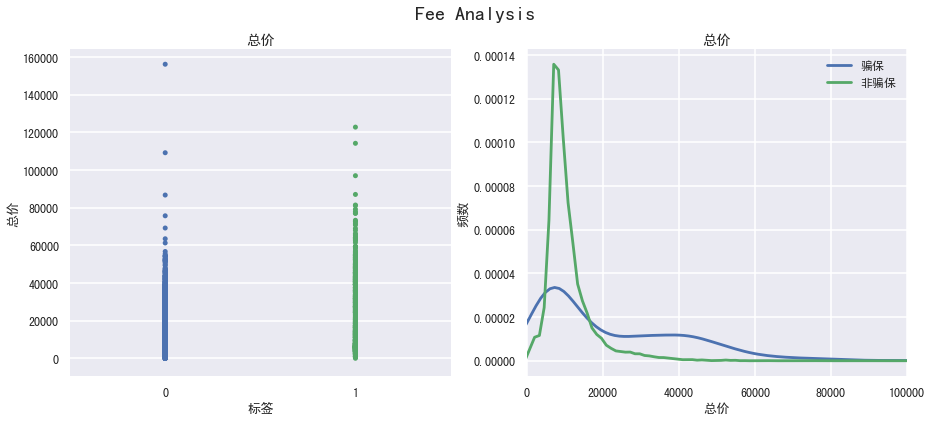

In [69]:
plot_fee('总价',fee_sum_label)

/home/zhh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


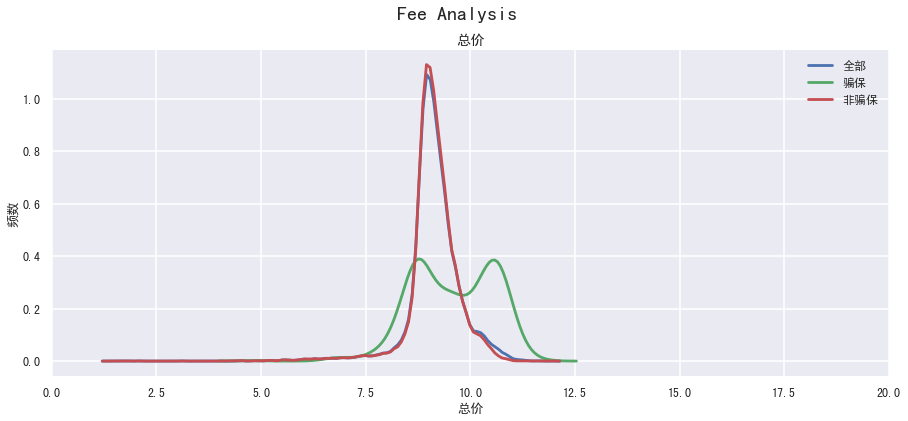

In [84]:
plot_log_fee('总价',fee_sum_label,0,20)

In [93]:
#  三表相联保存
temp = pd.merge(diease_name_new,fee_sum_label,how = 'left')

In [95]:
temp['总价'] = np.log(temp['总价']+0.0001)

In [112]:
sanmu_cont  = fee_detail_label[['个人编码','三目统计项目']].drop_duplicates()
sanmu_cont = sanmu_cont.groupby(['个人编码'])[['三目统计项目']].count()
sanmu_cont.reset_index(inplace=True)

In [118]:
# 连接三目统计表
fee_detail_result = pd.merge(temp,sanmu_cont,how='left')

In [119]:
fee_detail_result

,个人编码,三目空值,普通门诊,糖尿病门诊,其他门诊,乙肝,肝素钙,脑心通胶囊,通心络胶囊,其他胶囊,三目其他,标签,总价,三目统计项目
0,352120000000231,93,10,0,0,0,0,0,0,0,4,0,9.166671,4
1,352120000000386,71,1,0,0,0,0,0,0,0,5,0,8.876047,5
2,352120000000408,90,11,0,0,0,0,3,0,0,2,0,8.968648,3
3,352120000000409,44,14,0,0,0,0,0,0,0,9,0,8.951795,3
4,352120000000511,77,0,14,0,0,0,0,0,0,0,0,9.077065,2
5,352120000000674,157,0,16,0,0,0,0,0,0,2,0,9.300833,4
6,352120000001361,281,18,12,0,0,0,0,0,0,6,0,9.572848,5
7,352120000001462,187,15,11,0,0,0,0,0,0,0,0,9.393099,5
8,352120000001641,185,9,15,0,0,0,0,0,0,0,0,9.307611,5
9,352120000001710,138,4,13,0,0,0,0,0,0,0,0,9.498769,5


In [120]:
if os.path.exists('/home/zhh/文档/阿里巴巴/data/6.合表'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/6.合表')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/6.合表')
    os.chdir('/home/zhh/文档/阿里巴巴/data/6.合表')
with open('金额细节.pickle','wb') as f1:
    #data = pickle.load(f1)  
    pickle.dump(fee_detail_result,f1)